# Texas Real Estate market analysis

### In this project we analyst Texas real estate market data to make conclusion about pricing trends. We are going to build multiple regression model, whic could be used to forecast the price.

In [274]:
# Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


### Reading data in:

In [275]:
df=pd.read_csv('real_estate_texas_500_2024.csv')
df.head()

,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
0,https://www.realtor.com/realestateandhomes-det...,for_sale,9773941616,240000.0,2,2.0,2.0,3.0,1190.0,1.0,NaN,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,https://www.realtor.com/realestateandhomes-det...,for_sale,9224923922,379900.0,4,3.0,3.0,4.0,2033.0,1.0,NaN,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0
2,https://www.realtor.com/realestateandhomes-det...,for_sale,9840661824,370000.0,2,2.0,2.0,4.0,2062.0,1.0,NaN,PRICED TO SELL CORNER LOT HAS A STORM SHELTER ...,single_family,2012.0
3,https://www.realtor.com/realestateandhomes-det...,for_sale,7338317229,444000.0,4,3.0,3.0,5.0,3705.0,2.0,NaN,Come check out country living in the city! Are...,single_family,1985.0
4,https://www.realtor.com/realestateandhomes-det...,for_sale,7285845528,569000.0,2,2.0,2.0,3.0,3282.0,2.0,NaN,Welcome to your dream retreat! Nestled on over...,single_family,1981.0


### Data Exploration

In [276]:
df.describe()

,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,year_built
count,5.010000e+02,4.990000e+02,501.000000,436.000000,436.000000,440.000000,438.000000,391.000000,289.000000
mean,9.193045e+09,5.106686e+05,2.323353,2.332569,2.332569,3.454545,2334.568493,1.375959,1999.536332
std,7.789197e+08,1.321054e+06,1.286559,0.759276,0.759276,0.914439,3220.244985,0.525586,25.400942
min,7.021680e+09,1.000000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1891.000000
25%,8.995365e+09,2.647450e+05,2.000000,2.000000,2.000000,3.000000,1604.250000,1.000000,1981.000000
50%,9.419976e+09,3.749000e+05,2.000000,2.000000,2.000000,3.000000,2034.500000,1.000000,2006.000000
75%,9.798074e+09,5.390000e+05,3.000000,3.000000,3.000000,4.000000,2636.500000,2.000000,2022.000000
max,9.992374e+09,2.895000e+07,8.000000,8.000000,8.000000,9.000000,67139.000000,4.000000,2024.000000


### Select some features to explore more.

In [277]:
sdf=df[['listPrice', 'baths','baths_full','baths_full_calc','beds','sqft','stories','year_built','type']]
sdf

,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,year_built,type
0,240000.0,2,2.0,2.0,3.0,1190.0,1.0,2018.0,single_family
1,379900.0,4,3.0,3.0,4.0,2033.0,1.0,2002.0,single_family
2,370000.0,2,2.0,2.0,4.0,2062.0,1.0,2012.0,single_family
3,444000.0,4,3.0,3.0,5.0,3705.0,2.0,1985.0,single_family
4,569000.0,2,2.0,2.0,3.0,3282.0,2.0,1981.0,single_family
...,...,...,...,...,...,...,...,...,...
496,357707.0,2,2.0,2.0,3.0,1810.0,1.0,NaN,single_family
497,340000.0,2,2.0,2.0,3.0,1438.0,1.0,1979.0,single_family
498,2800000.0,0,NaN,NaN,NaN,4000.0,2.0,2023.0,farm
499,112500.0,0,NaN,NaN,NaN,NaN,NaN,NaN,land


### We can plot each of features

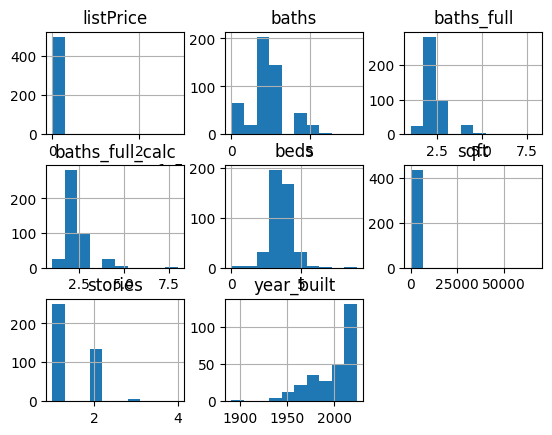

In [278]:
viz=sdf[['listPrice','baths','baths_full','baths_full_calc','beds','sqft','stories','year_built']]
viz.hist()
plt.show()

### Now we plot each of the features against ListPrice, to see how linear the relationship is

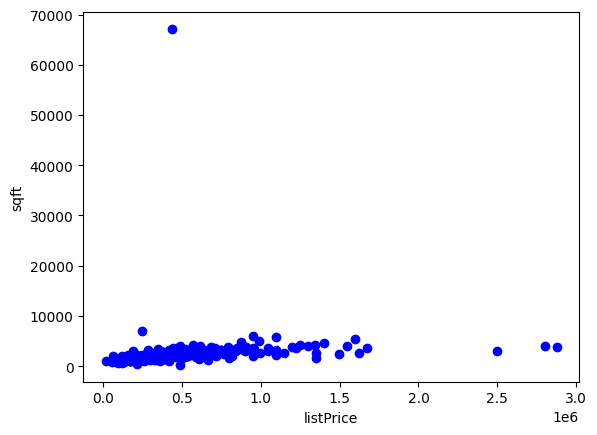

In [279]:
plt.scatter(sdf.listPrice, sdf.sqft, color='blue')
plt.xlabel('listPrice')
plt.ylabel('sqft')
plt.show()

### There are outlyers  - we will delete the outlyers from the dataframe using quantile

In [280]:
q=sdf['listPrice'].quantile(0.99)
sdf=sdf[sdf['listPrice']<q]

q2=sdf['sqft'].quantile(0.99)
sdf=sdf[sdf['sqft']<q2]

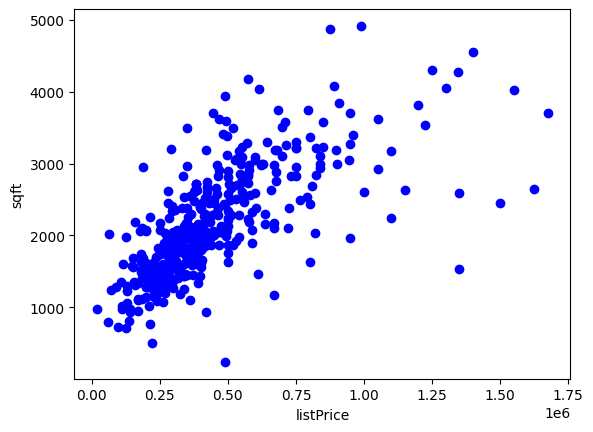

In [281]:
plt.scatter(sdf.listPrice, sdf.sqft, color='blue')
plt.xlabel('listPrice')
plt.ylabel('sqft')
plt.show()

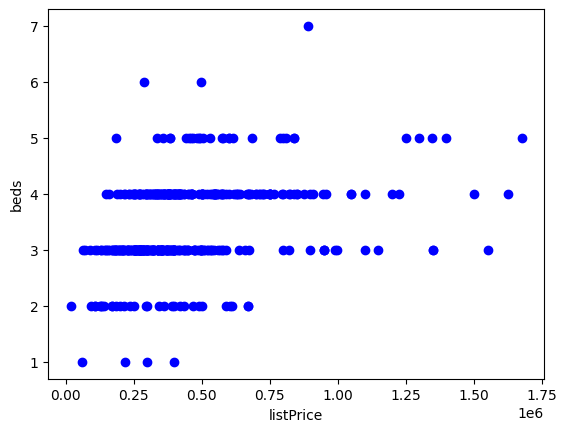

In [282]:
plt.scatter(sdf.listPrice, sdf.beds, color='blue')
plt.xlabel('listPrice')
plt.ylabel('beds')
plt.show()

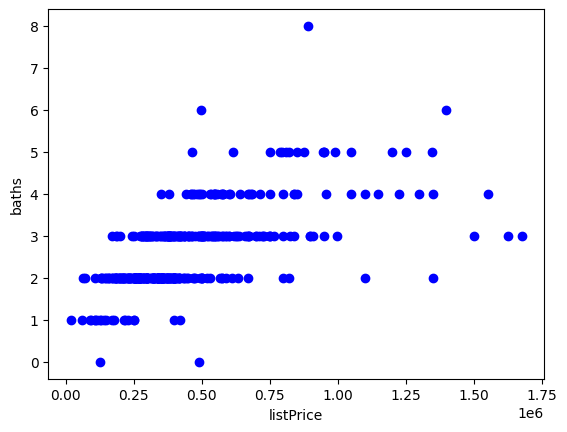

In [283]:
plt.scatter(sdf.listPrice, sdf.baths, color='blue')
plt.xlabel('listPrice')
plt.ylabel('baths')
plt.show()

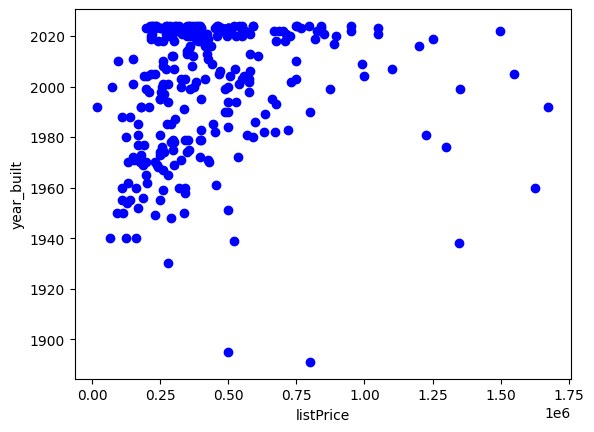

In [284]:
plt.scatter(sdf.listPrice, sdf.year_built, color='blue')
plt.xlabel('listPrice')
plt.ylabel('year_built')
plt.show()

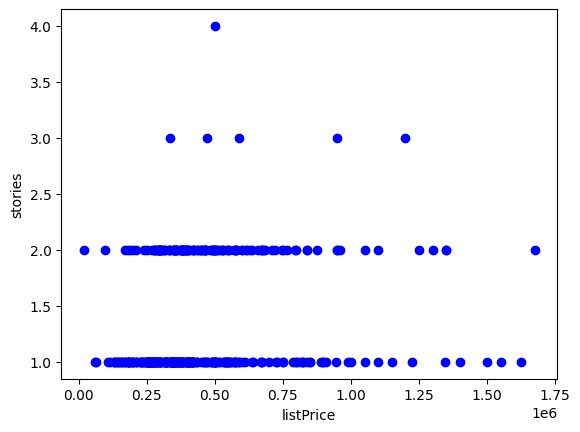

In [285]:
plt.scatter(sdf.listPrice, sdf.stories, color='blue')
plt.xlabel('listPrice')
plt.ylabel('stories')
plt.show()

In [286]:
sdf.columns

Index(['listPrice', 'baths', 'baths_full', 'baths_full_calc', 'beds', 'sqft',
       'stories', 'year_built', 'type'],
      dtype='object')

In [287]:
sdf.shape

(428, 9)

In [288]:
missing_values_count=sdf.isnull().sum()
print(missing_values_count)

listPrice            0
baths                0
baths_full           2
baths_full_calc      2
beds                 2
sqft                 0
stories             46
year_built         149
type                 0
dtype: int64


#### The dataset has some missing numbers including baths_full, baths_full_calc, stories, and year_built. We will replace some of the missing information.

#### The information about price we set as mean for the price column

In [306]:
sdf['baths_full'] = sdf['baths_full'].fillna(df['baths_full'].mean())
sdf['baths_full_calc'] = sdf['baths_full_calc'].fillna(df['baths_full_calc'].mean())
sdf['stories'] = sdf['stories'].fillna(df['stories'].mean())
sdf['sqft'] = sdf['sqft'].fillna(df['sqft'].mean())
sdf['year_built'] = sdf['year_built'].fillna(df['year_built'].mean())
sdf['listPrice'] = sdf['listPrice'].fillna(df['listPrice'].mean())
sdf['beds'] = sdf['beds'].fillna(df['beds'].mean())


In [307]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 500
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   listPrice        428 non-null    float64
 1   baths            428 non-null    int64  
 2   baths_full       428 non-null    float64
 3   baths_full_calc  428 non-null    float64
 4   beds             428 non-null    float64
 5   sqft             428 non-null    float64
 6   stories          428 non-null    float64
 7   year_built       428 non-null    float64
 8   type             428 non-null    object 
 9   condos           428 non-null    bool   
 10  farm             428 non-null    bool   
 11  mobile           428 non-null    bool   
 12  multi_family     428 non-null    bool   
 13  single_family    428 non-null    int64  
 14  townhomes        428 non-null    bool   
dtypes: bool(5), float64(7), int64(2), object(1)
memory usage: 38.9+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

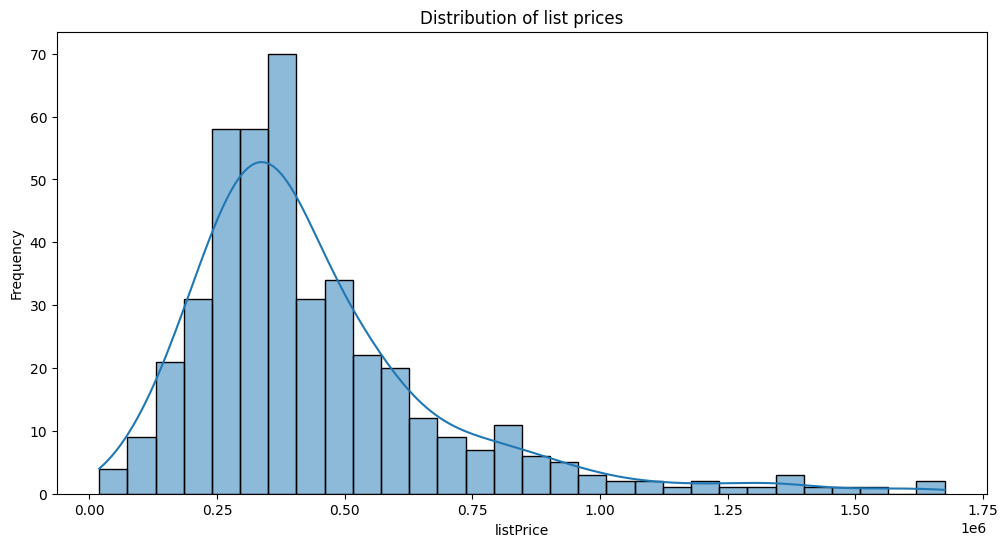

In [308]:
# We use visualization to show the distribution of the price
plt.figure(figsize = (12,6))
sns.histplot(sdf['listPrice'], bins=30,kde=True)
plt.title("Distribution of list prices")
plt.xlabel('listPrice')
plt.ylabel("Frequency")
plt.show

In [309]:
price_dist = sdf['listPrice'].describe()
price_dist

count    4.280000e+02
mean     4.426585e+05
std      2.588713e+05
min      1.900000e+04
25%      2.796750e+05
50%      3.790050e+05
75%      5.300000e+05
max      1.675000e+06
Name: listPrice, dtype: float64

,type,count
0,single_family,393
1,mobile,12
2,farm,11
3,townhomes,6
4,condos,5
5,multi_family,1


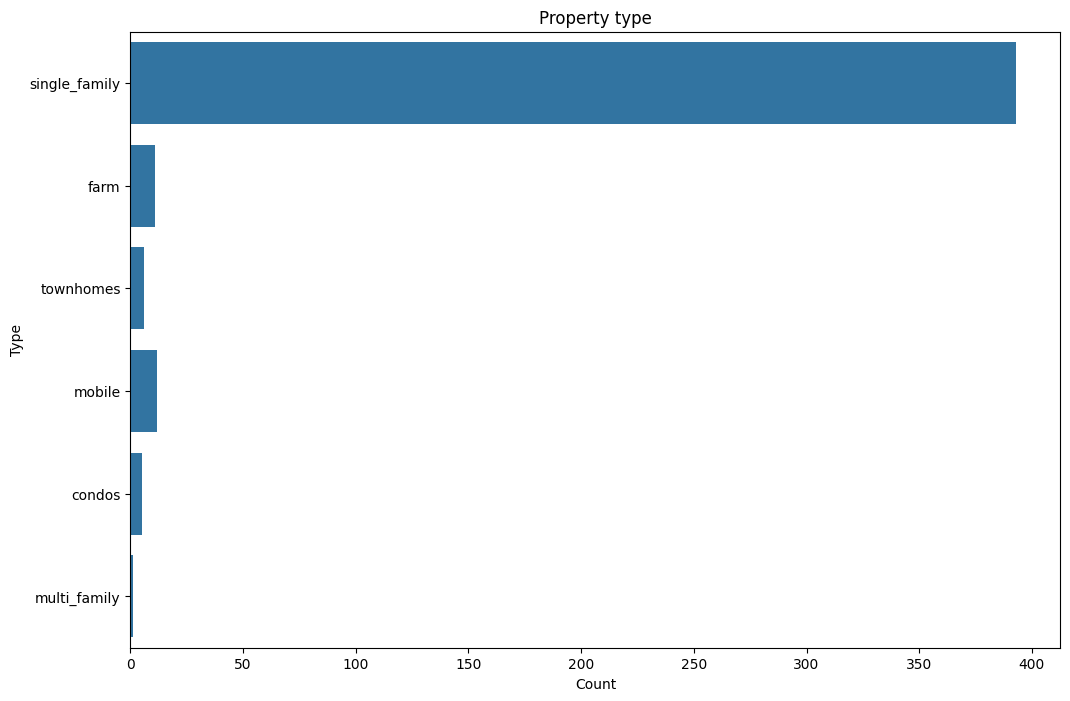

In [310]:
# We visualize the dataset property type 
plt.figure(figsize = (12,8))
sns.countplot(y = 'type', data=sdf, palette=None) 
plt.title("Property type")
plt.xlabel('Count')
plt.ylabel("Type")
plt.show

type_counts=sdf['type'].value_counts().reset_index()
type_counts

### We plot the list price by type of property

In [311]:
type_summary = sdf.groupby('type').agg(mean_listPrice=('listPrice','mean'), mean_sq_footage=('sqft','mean')).reset_index()
type_summary['mean_listPrice']=type_summary['mean_listPrice'].round(2)
type_summary

,type,mean_listPrice,mean_sq_footage
0,condos,577023.00,2199.600000
1,farm,718727.27,1900.727273
2,mobile,227633.33,1446.000000
3,multi_family,125000.00,1976.000000
4,single_family,441331.64,2182.590331
5,townhomes,394466.67,1910.666667


<function matplotlib.pyplot.show(close=None, block=None)>

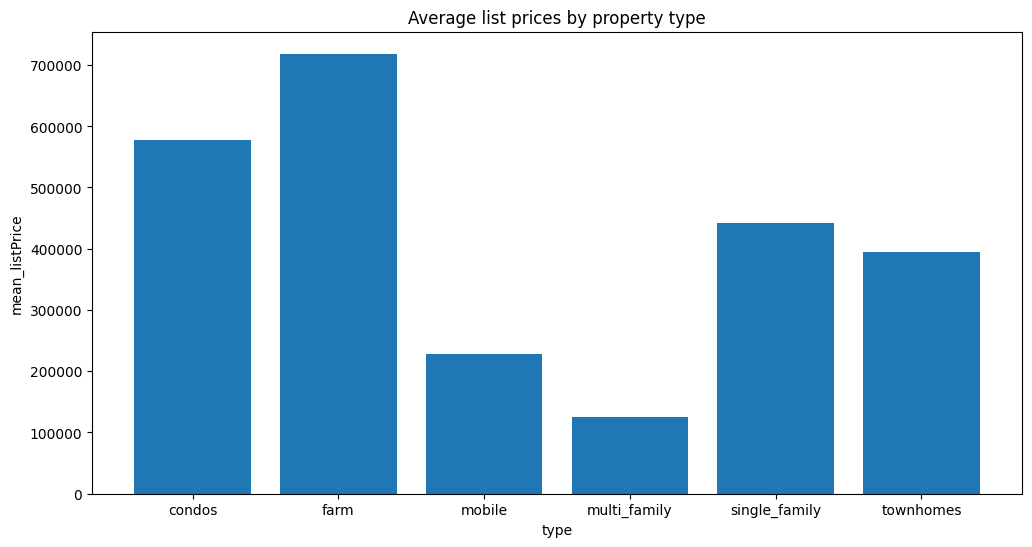

In [312]:
plt.figure(figsize = (12,6))
plt.bar(type_summary.type,type_summary.mean_listPrice)
plt.title("Average list prices by property type")
plt.xlabel('type')
plt.ylabel("mean_listPrice")
plt.show

In [313]:
sdf_type=pd.get_dummies(sdf['type'])


sdf_type

,condos,farm,mobile,multi_family,single_family,townhomes
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
494,False,False,False,False,True,False
495,False,False,False,False,True,False
496,False,False,False,False,True,False
497,False,False,False,False,True,False


In [314]:
# Merge data frame and dummy variable for type
sdf=pd.concat([sdf,sdf_type],axis=1)

sdf.head()

,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,year_built,type,condos,...,mobile,multi_family,single_family,townhomes,condos,farm,mobile,multi_family,single_family,townhomes
0,240000.0,2,2.0,2.0,3.0,1190.0,1.0,2018.0,single_family,False,...,False,False,1,False,False,False,False,False,True,False
1,379900.0,4,3.0,3.0,4.0,2033.0,1.0,2002.0,single_family,False,...,False,False,1,False,False,False,False,False,True,False
2,370000.0,2,2.0,2.0,4.0,2062.0,1.0,2012.0,single_family,False,...,False,False,1,False,False,False,False,False,True,False
3,444000.0,4,3.0,3.0,5.0,3705.0,2.0,1985.0,single_family,False,...,False,False,1,False,False,False,False,False,True,False
4,569000.0,2,2.0,2.0,3.0,3282.0,2.0,1981.0,single_family,False,...,False,False,1,False,False,False,False,False,True,False


In [315]:
sdf['single_family'] = sdf['single_family'].fillna(0)
sdf['single_family'] = sdf['single_family'].replace(False,0)
sdf['single_family'] = sdf['single_family'].replace(True,1)
sdf.head()

,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,year_built,type,condos,...,mobile,multi_family,single_family,townhomes,condos,farm,mobile,multi_family,single_family,townhomes
0,240000.0,2,2.0,2.0,3.0,1190.0,1.0,2018.0,single_family,False,...,False,False,1,False,False,False,False,False,1,False
1,379900.0,4,3.0,3.0,4.0,2033.0,1.0,2002.0,single_family,False,...,False,False,1,False,False,False,False,False,1,False
2,370000.0,2,2.0,2.0,4.0,2062.0,1.0,2012.0,single_family,False,...,False,False,1,False,False,False,False,False,1,False
3,444000.0,4,3.0,3.0,5.0,3705.0,2.0,1985.0,single_family,False,...,False,False,1,False,False,False,False,False,1,False
4,569000.0,2,2.0,2.0,3.0,3282.0,2.0,1981.0,single_family,False,...,False,False,1,False,False,False,False,False,1,False


### We group the information by year of construction for property dataset to calculate for each year the mean price and footage

In [329]:

yearly_summary = sdf.groupby('year_built').agg(av_listPrice=('listPrice','mean'), av_sq_footage=('sqft','mean')).reset_index()

yearly_summary['av_listPrice']=yearly_summary['av_listPrice'].round(2)
yearly_summary


,year_built,av_listPrice,av_sq_footage
0,1891.0,800000.00,1634.000000
1,1895.0,499800.00,1752.000000
2,1930.0,280000.00,2448.000000
3,1938.0,1349000.00,2590.000000
4,1939.0,519900.00,3493.000000
...,...,...,...
73,2020.0,452954.17,2501.666667
74,2021.0,480838.31,2316.461538
75,2022.0,603420.62,2389.562500
76,2023.0,423902.08,1961.120000


### We plot the average prices per year per footage

<function matplotlib.pyplot.show(close=None, block=None)>

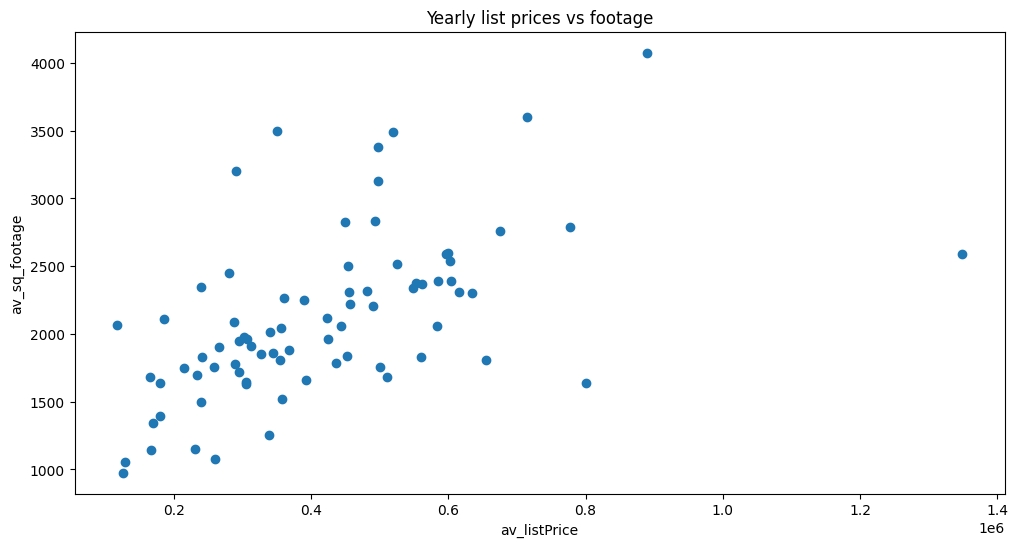

In [317]:
plt.figure(figsize = (12,6))
plt.scatter(yearly_summary.av_listPrice,yearly_summary.av_sq_footage)
plt.title("Yearly list prices vs footage")
plt.xlabel('av_listPrice')
plt.ylabel("av_sq_footage")
plt.show

### We choose two features - year built and the area of a house to build a linear regression model

In [350]:

X=sdf[['sqft','year_built','baths_full_calc','beds','single_family']]
y=sdf['listPrice']

In [351]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

regr = linear_model.LinearRegression()

regr.fit (X_train, y_train)


LinearRegression()

In [352]:
# The coefficients of the regression

print ('Coefficients: ', regr.coef_)

Coefficients:  [   220.38386643    795.71798549  75992.32812823 -50241.28307648
 -54650.24889974 -54650.24889974]


In [353]:
y_pred = regr.predict(X_test)


In [354]:
from sklearn.metrics import r2_score

regr_MAE=np.mean(np.absolute(y_pred-y_test))
regr_MSE=np.mean((y_pred-y_test)**2)
regr_R2=r2_score(y_pred,y_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred, y_test) )

Mean absolute error: 112622.27
Residual sum of squares (MSE): 27920285570.33
R2-score: 0.35


In [323]:
Z=sdf[['sqft']]
y=sdf['listPrice']

In [340]:
Z_train,Z_test,y_train,y_test=train_test_split(Z,y,test_size=0.2,random_state=4)

regr1 = linear_model.LinearRegression()

regr1.fit (Z_train, y_train)

LinearRegression()

In [341]:
print ('Coefficients: ', regr1.coef_)

Coefficients:  [238.75842895]


In [342]:
y_predict = regr1.predict(Z_test)

In [343]:

regr1_MAE=np.mean(np.absolute(y_predict-y_test))
regr1_MSE=np.mean((y_predict-y_test)**2)
regr1_R2=r2_score(y_predict,y_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predict - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predict - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_predict, y_test) )

Mean absolute error: 116167.09
Residual sum of squares (MSE): 28975006011.62
R2-score: 0.27


### We check the model for average per year price and footage

In [337]:
X2 = yearly_summary[['av_sq_footage']]
y2 = yearly_summary['av_listPrice']

In [344]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=4)

regr2 = linear_model.LinearRegression()

regr2.fit (X2_train, y2_train)

LinearRegression()

In [347]:
print ('Coefficients: ', regr2.coef_)

Coefficients:  [207.95764913]


In [348]:
y2_predict = regr2.predict(X2_test)

In [349]:
regr2_MAE=np.mean(np.absolute(y2_predict-y2_test))
regr2_MSE=np.mean((y2_predict-y2_test)**2)
regr2_R2=r2_score(y2_predict,y2_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y2_predict - y2_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y2_predict - y2_test) ** 2))
print("R2-score: %.2f" % r2_score(y2_predict, y2_test) )

Mean absolute error: 143890.15
Residual sum of squares (MSE): 30620562176.40
R2-score: -0.49


### Our result is not optimal - R2 is relatively low for multiple regression and negative for yearly averages.

In [406]:
df_final=pd.DataFrame({'Model':['Multiple Regression - All Features)','Yearly averages model for footage','Single Regression model for footage'],
                    'MAE':[regr_MAE.round(0),regr2_MAE.round(0),regr1_MAE.round(0)],
                    'MSE':[regr_MSE.round(0),regr2_MSE.round(0),regr1_MSE.round(0)],
                    'R2':[regr_R2.round(2),regr2_R2.round(2),regr1_R2.round(2)]})
    

df_final

,Model,MAE,MSE,R2
0,Multiple Regression - All Features),112622.0,2.792029e+10,0.35
1,Yearly averages model for footage,143890.0,3.062056e+10,-0.49
2,Single Regression model for footage,116167.0,2.897501e+10,0.27


#### The model we are choosing out of three is the model, which includes all forecasting parameters: footage sqft, number of baths, number of beds, year built, and single family home type or not.